In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [5]:
url = 'https://raw.githubusercontent.com/js-designs-321/wine_quality_analysis/main/winequality-red.csv'
wine = pd.read_csv(url)

In [6]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: xlabel='quality', ylabel='fixed acidity'>

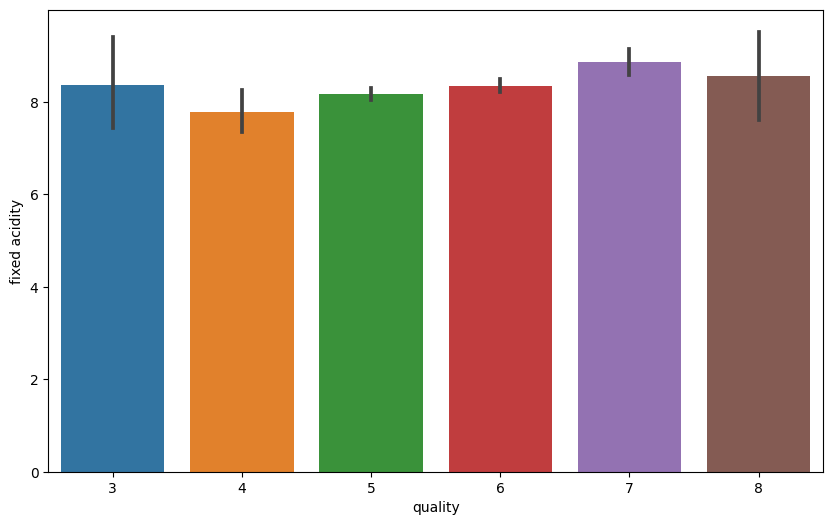

In [8]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

In [9]:
#Here we see that fixed acidity does not give any specification to classify the quality.

<Axes: xlabel='quality', ylabel='volatile acidity'>

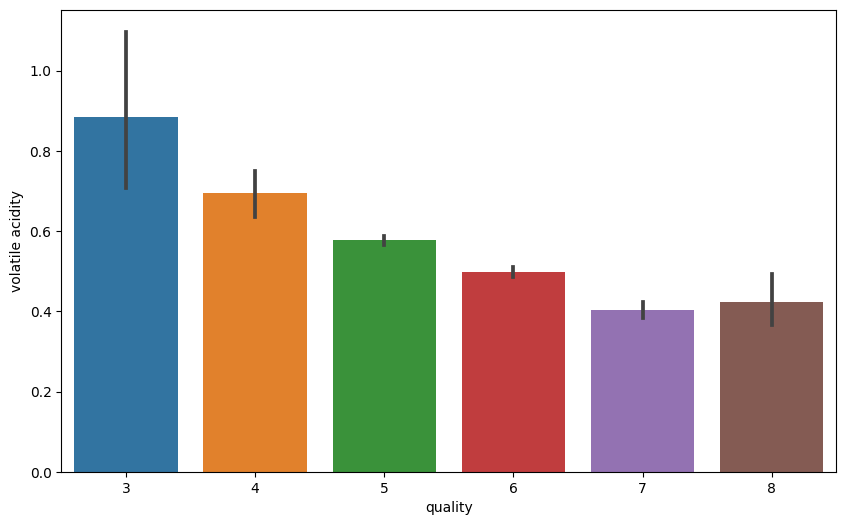

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

In [11]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 

<Axes: xlabel='quality', ylabel='citric acid'>

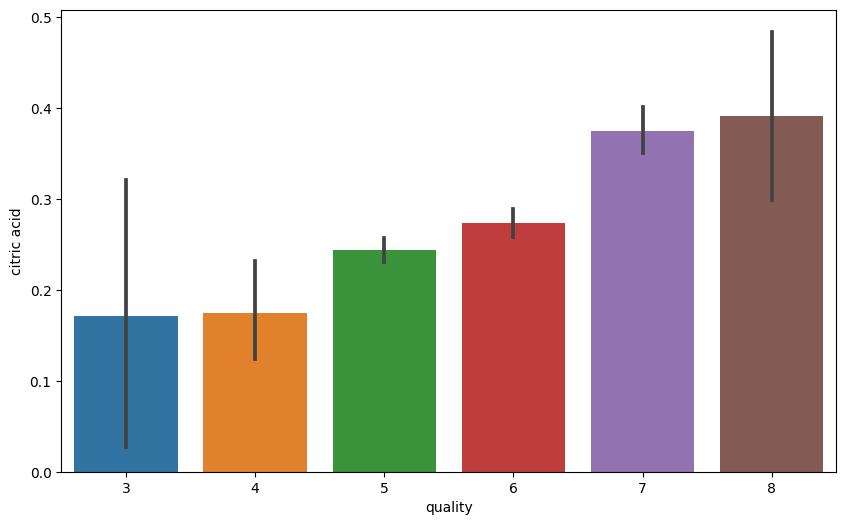

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

In [13]:
#Composition of citric acid go higher as we go higher in the quality of the wine

<Axes: xlabel='quality', ylabel='residual sugar'>

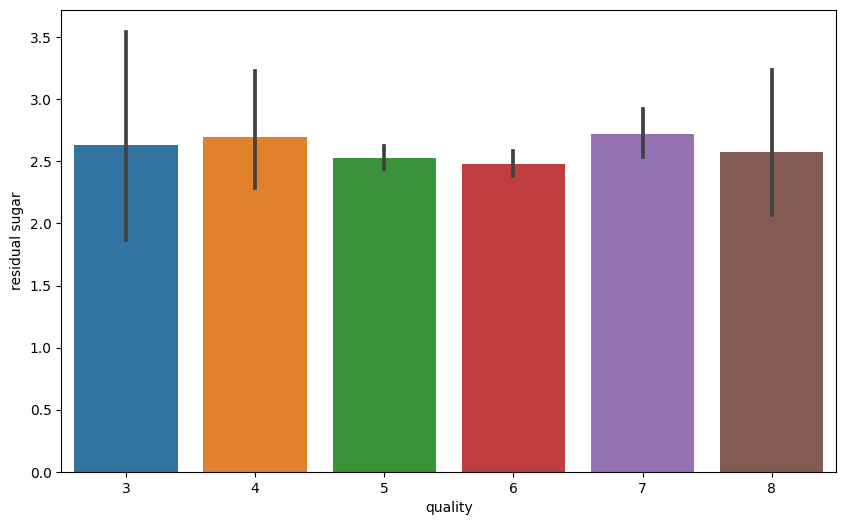

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

In [15]:
#Here we see that residual sugar does not give any specification to classify the quality.

<Axes: xlabel='quality', ylabel='chlorides'>

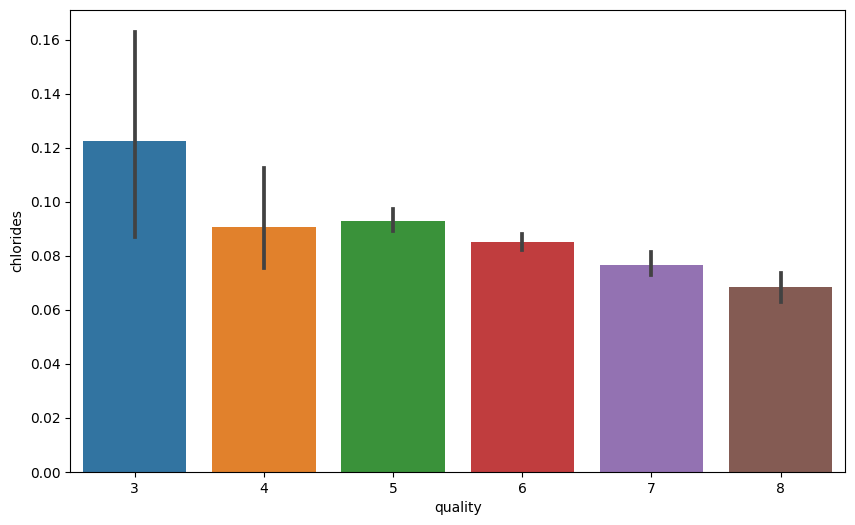

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

In [17]:
#Composition of chloride also go down as we go higher in the quality of the wine

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

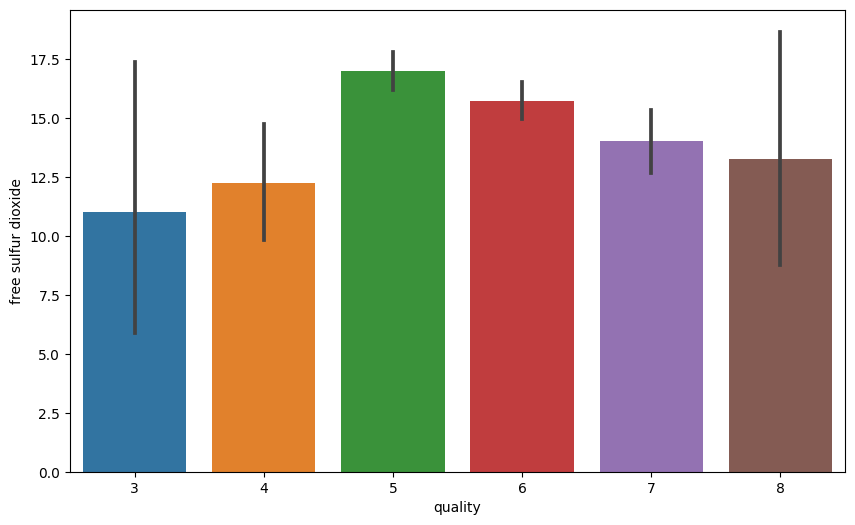

In [18]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

In [19]:
# No linear relationship is observed

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

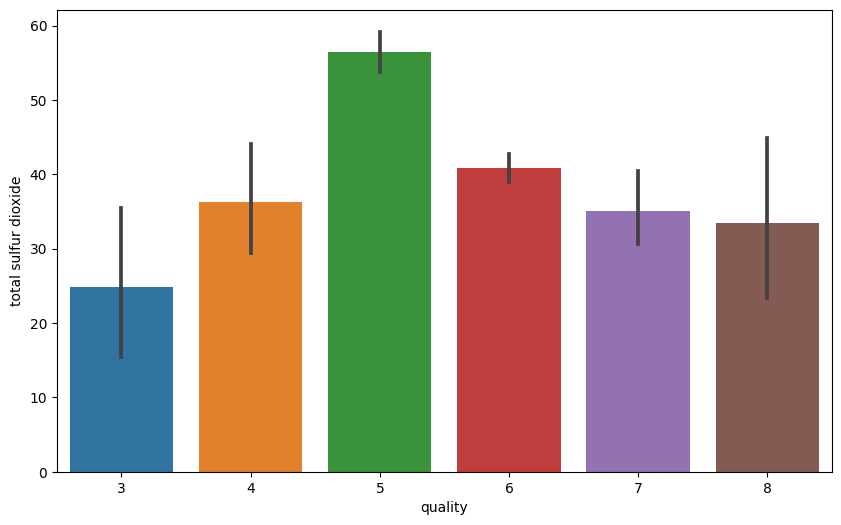

In [20]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

In [21]:
# No linear relationship is observed

<Axes: xlabel='quality', ylabel='sulphates'>

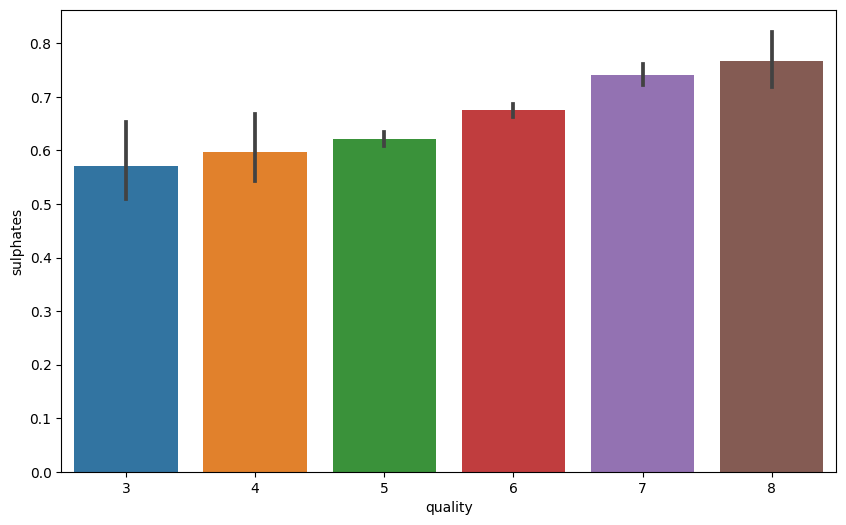

In [22]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

In [23]:
#Sulphates level goes higher with the quality of wine

<Axes: xlabel='quality', ylabel='alcohol'>

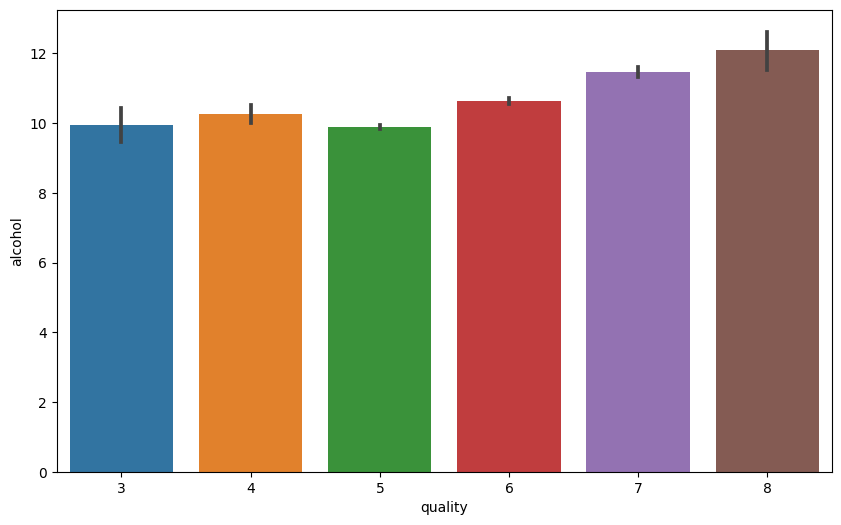

In [24]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

In [25]:
#Alcohol level also goes higher as the quality of wine increases

In [26]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [27]:
label_quality = LabelEncoder()

In [28]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [29]:
#Bad becomes 0 and good becomes 1 

In [33]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

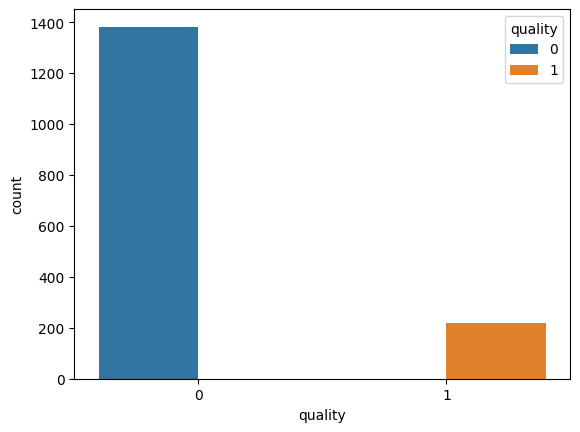

In [34]:
sns.countplot(data=wine, x='quality', hue='quality')

In [35]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
sc = StandardScaler()

In [38]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**Random Forest Classifier**

In [39]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [40]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       273
           1       0.72      0.38      0.50        47

    accuracy                           0.89       320
   macro avg       0.81      0.68      0.72       320
weighted avg       0.88      0.89      0.87       320



Random forest gives the accuracy of 89%

Stochastic Gradient Decent Classifier

In [41]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [42]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       273
           1       0.47      0.38      0.42        47

    accuracy                           0.85       320
   macro avg       0.69      0.65      0.67       320
weighted avg       0.83      0.85      0.84       320



Stochastic Gradient gives the accuracy of 85%

Support Vector Classifier

In [43]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [44]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



Support Vector Classifier gives the accuracy of 88%

In [45]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [46]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [47]:
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [48]:
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



SVC improves from 88% to 90% using Grid Search CV

In [49]:
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9116695374015749

Random forest accuracy increases from 89% to 91% using cross validation score